In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv(r"bank-full.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# duplicates in that file
df.duplicated().sum()

0

In [53]:
# null in that file
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

<Axes: >

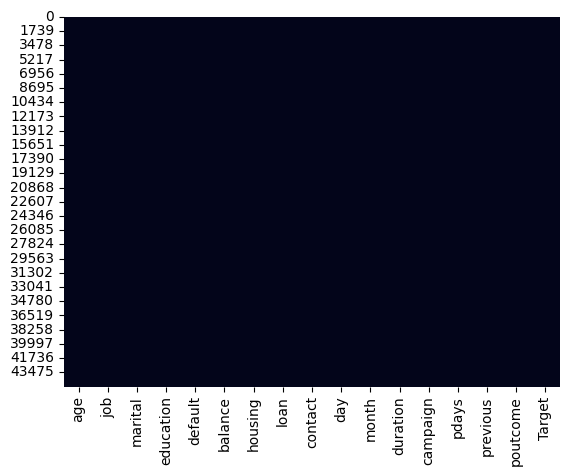

In [8]:
sns.heatmap(df.isnull(),cbar=False)

In [10]:
# Reading column Name
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
# check unique balance in that file
df.balance.unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353], dtype=int64)

In [14]:
# type of balance
print(type(df['balance']))

<class 'pandas.core.series.Series'>


In [15]:
#Some Transformations
df['balance'] = df['balance'].astype(str) #Changing the cost to string
df['balance'] = df['balance'].apply(lambda x: x.replace(',','')) #Using lambda function to replace ',' from cost
df['balance'] = df['balance'].astype(float) # Changing the cost to Float
df.info() # looking at the dataset information after transformatio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  Target     45211 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.9+ MB


In [16]:
print(type(df['balance']))

<class 'pandas.core.series.Series'>


In [17]:
# unique duration in file
df['duration'].unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556], dtype=int64)

In [18]:
# it shows the information in the file 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  Target     45211 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.9+ MB


<Axes: ylabel='count'>

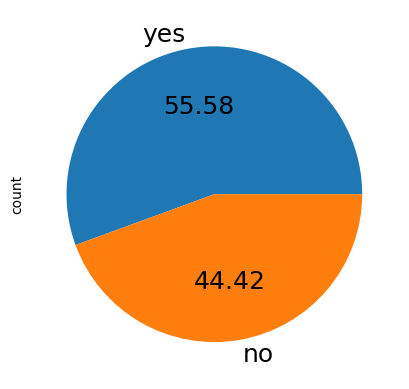

In [21]:
# create pie chart by using housing values

df.housing.value_counts().plot.pie(fontsize = 18,autopct = '%.2f')

<Axes: ylabel='count'>

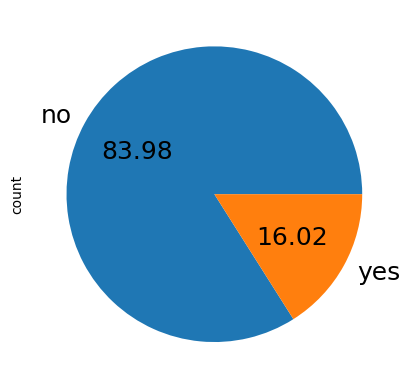

In [22]:
# create pie chart by using loan values
df.loan.value_counts().plot.pie(fontsize = 18, autopct = '%.2f')

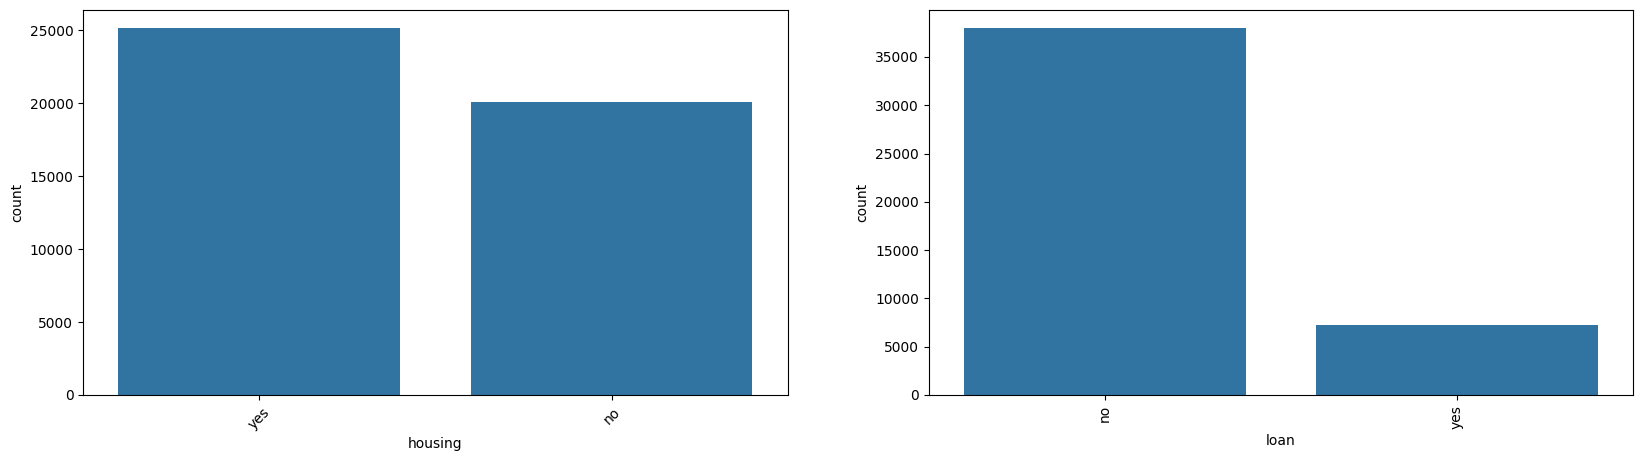

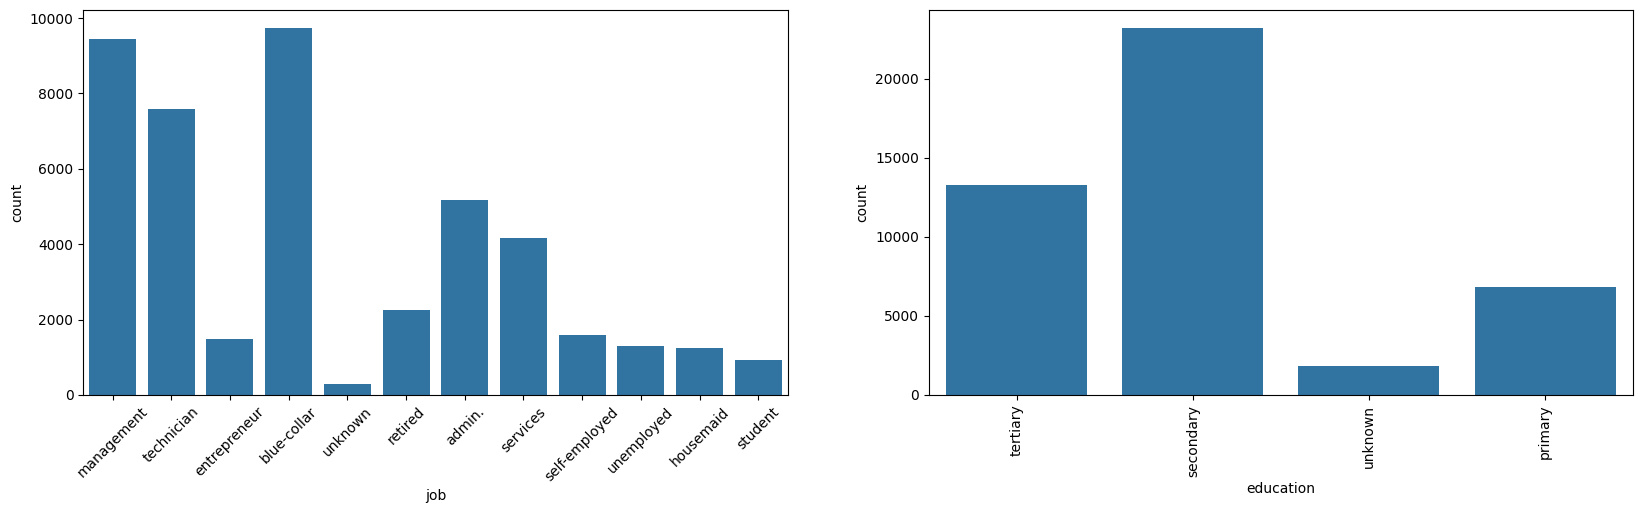

In [23]:
cat_cols = ['housing','loan','job','education']
i = 0
while i < 4:
    fig = plt.figure(figsize=[20,5])
    
    
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    plt.xticks(rotation=45)
    i += 1
    
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    plt.xticks(rotation=90)
    i += 1
    
    plt.show()

In [24]:
df.age.value_counts().head(30).iplot(kind='bar')

In [25]:
df.marital.value_counts().head(30).iplot(kind='bar')

In [26]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


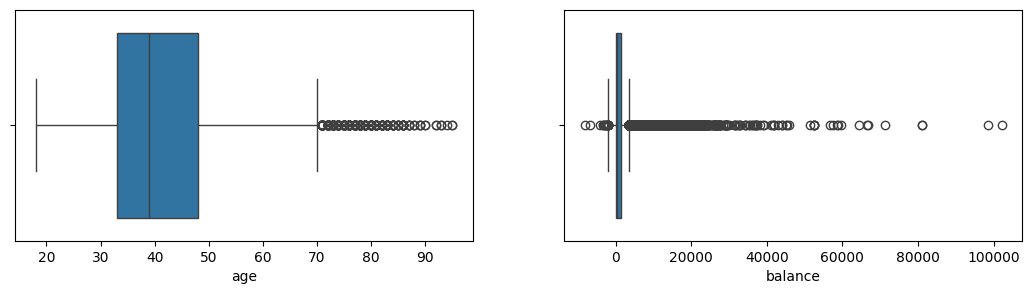

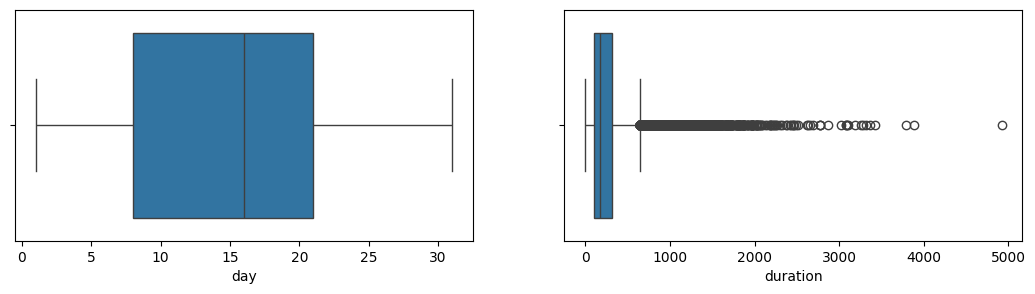

In [28]:
num_cols = ['age','balance','day','duration','campaign','pdays','previous']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

In [31]:
df[df.balance>30000].sort_values(ascending = False,by = 'balance')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
39989,51,management,single,tertiary,no,102127.0,no,no,cellular,3,jun,90,1,-1,0,unknown,no
26227,59,management,married,tertiary,no,98417.0,no,no,telephone,20,nov,145,5,-1,0,unknown,no
43393,84,retired,married,secondary,no,81204.0,no,no,telephone,1,apr,390,1,94,3,success,yes
42558,84,retired,married,secondary,no,81204.0,no,no,telephone,28,dec,679,1,313,2,other,yes
41693,60,retired,married,primary,no,71188.0,no,no,cellular,6,oct,205,1,-1,0,unknown,no
19785,56,management,divorced,tertiary,no,66721.0,no,no,cellular,8,aug,442,2,-1,0,unknown,no
21192,52,blue-collar,married,primary,no,66653.0,no,no,cellular,14,aug,109,3,-1,0,unknown,no
19420,59,admin.,married,unknown,no,64343.0,no,no,cellular,6,aug,45,4,-1,0,unknown,no
41374,32,entrepreneur,single,tertiary,no,59649.0,no,no,cellular,1,sep,69,2,-1,0,unknown,no
12926,56,blue-collar,married,secondary,no,58932.0,no,no,telephone,7,jul,339,2,-1,0,unknown,no


In [33]:
x = df[df.balance>30000]
x = x.sort_values(ascending = False,by = 'balance')
x = x.education.value_counts()

In [34]:
x.iplot(kind='bar')

In [36]:
df[df.balance>30000].sort_values(ascending = False , by = 'balance').education.value_counts().iplot(kind='bar')

In [37]:
df[df.balance>30000].loan.value_counts().iplot(kind='bar')

In [38]:
df['education'].value_counts().head(20).iplot(kind='bar')

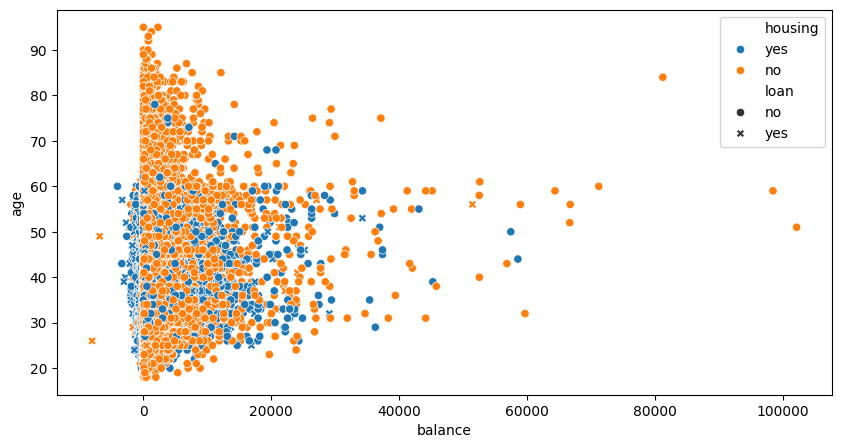

In [41]:
plt.figure(figsize=(10,5))
sns.scatterplot(x ='balance',y = 'age',hue = 'housing',data = df,style='loan')
plt.show()

In [42]:
df[(df['balance'] <= 100) & (df['age']>=4)].sort_values(by=['age'],ascending = False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
41663,95,retired,married,secondary,no,0.0,no,no,telephone,1,oct,215,1,-1,0,unknown,no
31069,90,retired,divorced,secondary,no,1.0,no,no,cellular,13,feb,152,3,-1,0,unknown,yes
44892,89,retired,married,primary,no,0.0,no,no,telephone,27,sep,157,5,-1,0,unknown,no
41291,86,retired,divorced,primary,no,0.0,no,no,telephone,26,aug,189,1,-1,0,unknown,yes
32105,86,retired,married,primary,no,0.0,no,no,cellular,15,apr,141,12,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33789,19,student,single,secondary,no,96.0,no,no,cellular,23,apr,106,3,-1,0,unknown,no
41057,19,student,single,unknown,no,60.0,no,no,cellular,14,aug,253,1,-1,0,unknown,no
41222,18,student,single,unknown,no,35.0,no,no,telephone,21,aug,104,2,-1,0,unknown,no
41252,18,student,single,secondary,no,5.0,no,no,cellular,24,aug,143,2,-1,0,unknown,no


In [43]:
df['balance'].mean()

1362.2720576850766

In [45]:
df[(df['balance']<=df['balance'].mean()) & (df['age']>= 4)].sort_values(by=['age'],ascending=False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
41663,95,retired,married,secondary,no,0.0,no,no,telephone,1,oct,215,1,-1,0,unknown,no
31233,94,retired,divorced,secondary,no,1234.0,no,no,cellular,3,mar,212,1,-1,0,unknown,no
44420,93,retired,married,unknown,no,775.0,no,no,cellular,4,aug,476,2,13,9,success,yes
44262,93,retired,married,unknown,no,775.0,no,no,cellular,22,jul,860,2,177,7,success,yes
41934,92,retired,married,unknown,no,775.0,no,no,cellular,22,oct,313,3,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44644,18,student,single,unknown,no,438.0,no,no,cellular,1,sep,425,1,-1,0,unknown,no
41222,18,student,single,unknown,no,35.0,no,no,telephone,21,aug,104,2,-1,0,unknown,no
42274,18,student,single,primary,no,608.0,no,no,cellular,13,nov,210,1,93,1,success,yes
42146,18,student,single,secondary,no,156.0,no,no,cellular,4,nov,298,2,82,4,other,no


In [46]:
df['balance'].mean()

1362.2720576850766

In [47]:
df.marital.value_counts().sort_values(ascending = False).head(10).iplot(kind='bar')

In [48]:
resbyloc = df.groupby('education')

In [49]:
resbyloc.balance.mean()

education
primary      1250.949934
secondary    1154.880786
tertiary     1758.416435
unknown      1526.754443
Name: balance, dtype: float64